## Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
% matplotlib inline

## Step 1: Gathering Data

In [3]:
# Read twitter-archive_enhanced file into pandas
tweet_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Download image-prediction files with request function
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

open('image_predictions.tsv', mode='wb').write(r.content)

335079

In [5]:
# Read image predictions file into pandas
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# Query the Twitter API for each tweet's JSON data using Python's Tweepy library
consumer_key = 'INVISIBLE'
consumer_secret = 'INVISIBLE'
access_token = 'INVISIBLE'
access_secret = 'INVISIBLE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = tweet_archive_df.tweet_id.values

with open('tweet_json.txt', 'w') as results:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, results)
            results.write('\n')
        except tweepy.TweepError:
            print('Error: Tweet Unavailable')

Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Rate limit reached. Sleeping for: 642
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Error: Tweet Unavailable
Rate limit reached. Sleeping for: 723
Error: Tweet Unavailable
Rate limit reached. Sleeping for: 725


In [6]:
# changing json data to pandas dataframe

tweets_data = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        
        dict_tweets = {}
        json_tweets = json.loads(line)
        
        tweets_data.append({'tweet_id': json_tweets['id'],
                        'retweet_count': json_tweets['retweet_count'],
                        'favorite_count': json_tweets['favorite_count']
                           })

In [7]:
# Save dataframe to tweet_count
tweet_count = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


## Step 2: Assessing Data

### 1) Twitter Archives Data

In [8]:
# View shape of tweet_archive dataframe
tweet_archive_df.shape

(2356, 17)

In [9]:
# View first five rows of tweet_archive dataframe
tweet_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# View properties of tweet_archive dataframe
tweet_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# View column with null values in tweet_archive dataframe
tweet_archive_df.isnull().any().sum()

6

In [12]:
# Confirm colums=ns with null values in the tweet_archive dataframe
tweet_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
# View value counts for the rating_numerator column
tweet_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# Check for duplicates
sum(tweet_archive_df.duplicated())

0

In [15]:
# View value counts for the rating_denominator column
tweet_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# View value count for the dog lingos
print(tweet_archive_df.doggo.value_counts())
print('\n')
print(tweet_archive_df.floofer.value_counts())
print('\n')
print(tweet_archive_df.pupper.value_counts())
print('\n')
print(tweet_archive_df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64


None       2346
floofer      10
Name: floofer, dtype: int64


None      2099
pupper     257
Name: pupper, dtype: int64


None     2326
puppo      30
Name: puppo, dtype: int64


In [17]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('doggo != "None" and floofer != "None"'))

1

In [18]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('doggo != "None" and pupper != "None"'))

12

In [19]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('doggo != "None" and puppo != "None"'))

1

In [20]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('floofer != "None" and pupper != "None"'))

0

In [21]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('floofer != "None" and puppo != "None"'))

0

In [22]:
# Check for rows where dog stage is conflicting
len(tweet_archive_df.query('pupper != "None" and puppo != "None"'))

0

In [23]:
# Check value counts of the source column
tweet_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
# Check value counts of the name column
tweet_archive_df.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [25]:
# Check value count for the name column
tweet_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Toby            7
an              7
Daisy           7
Buddy           7
Scout           6
Rusty           6
Bella           6
Koda            6
Stanley         6
Oscar           6
Jax             6
Jack            6
Leo             6
Milo            6
Dave            6
Chester         5
             ... 
Chuck           1
Florence        1
life            1
Brandonald      1
Ester           1
Tater           1
Raphael         1
Anthony         1
Ron             1
Ashleigh        1
Karma           1
Trip            1
Bobbay          1
Shikha          1
Snoopy          1
Rueben          1
Siba            1
Clybe           1
Flurpson        1
Ambrose         1
Roscoe          1
Ferg            1
Brian           1
Clyde           1
Burt      

### 2) Image Predictions Data

In [26]:
# View shape of image_predictions data
image_predictions.shape

(2075, 12)

In [27]:
# View the first five rows of image_predictions dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
# View properties of image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
# Check for duplicates
sum(image_predictions.duplicated())

0

In [30]:
# Check for null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
# Check value counts for the algorithm's #1 prediction
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [32]:
# Check value counts for the algorithm's #2 prediction
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [33]:
# Check value counts for the algorithm's #3 prediction
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### 3) Tweet_count

In [34]:
# Check dataframe shape
tweet_count.shape

(2331, 3)

In [35]:
# Check fist five rows of tweet_count
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7795,36603
1,892177421306343426,5774,31542
2,891815181378084864,3822,23761
3,891689557279858688,7964,39937
4,891327558926688256,8603,38136


In [36]:
# Check dataframe properties
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [37]:
# Check for duplicates
sum(tweet_count.duplicated())

0

In [38]:
# Check tweet_count dataframe descriptive statistics
tweet_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2739.008151,7648.988417
std,6.823170e+16,4631.653047,11868.466479
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,553.500000,1337.000000
50%,7.182469e+17,1286.000000,3331.000000
75%,7.986692e+17,3187.000000,9382.000000
max,8.924206e+17,78811.000000,158176.000000


In [39]:
# Check for null values in the data
tweet_count.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

## Data Assessment

### Quality Issues

- The columns with timestamps should be converted to datetime.
- The `rating_denominator` column has values less than 10.
- Clean up the `name` column in the `tweet_archives` data set, the column contains words that are not names, such as, officially, infuriating, getting, etc.
- The number of tweet id's in the `tweet_id`column of the `twitter archive data set` is more than the number of tweet_id's in `tweet_id` column of the `image prediction data set`.
- The `source` column should be cleaned up as it contains html characters.
- There is completeness issue in the columns relating to `in_reply` in the `twitter archive data set`.
- There are rows with conflicting stages, i.e., more than one stage.

### Tidiness Issues

- The `dog stage` columns should be merged into one column.
- There is completeness issue in the columns relating to `retweets` in the `twitter archive data set`.
- A new column should be added for the various dog breeds.
- Merge data frames together.

## Step 3: Data Cleaning

### Quality 

In [40]:
# Make a copy of the tweet_archive data set
df_clean_archive = tweet_archive_df.copy()

In [41]:
# Make a copy of the tweet_count data set
tweet_count_clean = tweet_count.copy()

In [42]:
# Make a copy of the image_predictions data set
img_prediction_clean = image_predictions.copy()

### Define
- Fix the unequal rows in the archives_clean data set and image_predictions data set, such that the rows in the archives_clean data set will match the rows in the image_prdeictions data set and all tweet_id's in the archives data set will have images.

### Code

In [43]:
df_clean_archive = df_clean_archive[df_clean_archive.tweet_id.isin(image_predictions.tweet_id)]

### Test

In [44]:
len(df_clean_archive['tweet_id']) == len(image_predictions['tweet_id'])

True

### Define
- Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in the archives_clean data set, there are too many missing values and i will not be using the columns for my analysis.

### Code

In [45]:
df_clean_archive.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

### Test

In [46]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2075 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2075 non-null object
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2075 non-null object
rating_numerator         2075 non-null int64
rating_denominator       2075 non-null int64
name                     2075 non-null object
doggo                    2075 non-null object
floofer                  2075 non-null object
pupper                   2075 non-null object
puppo                    2075 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 243.2+ KB


### Define
- Convert timestamp column to datetime

### Code

In [47]:
df_clean_archive['timestamp'] = pd.to_datetime(df_clean_archive['timestamp'])

### Test

In [48]:
df_clean_archive[['timestamp']].dtypes

timestamp    datetime64[ns]
dtype: object

### Define
- Delete rows with `rating_denominator` less than 10

### Code

In [49]:
rating_denominator = df_clean_archive.query('rating_denominator < 10 or rating_denominator > 10').index
 
# Delete these row indexes from dataFrame
df_clean_archive.drop(rating_denominator , inplace=True)

### Test

In [50]:
df_clean_archive.query('rating_denominator < 10 or rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define 
- Clean up the `source` column such that the html characters are stripped

### Code

In [51]:
df_clean_archive.source = df_clean_archive.source.str.replace(r'<[^>]+>', '')

In [52]:
# Change the datatype to category
df_clean_archive.source = df_clean_archive.source.astype('category')

### Test

In [53]:
df_clean_archive.source.value_counts()

Twitter for iPhone    2016
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### Define
- Replace all words that are not names with `None`, since `None` has the highest value count.

### Code

In [54]:
df_clean_archive['name'][df_clean_archive['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test

In [55]:
df_clean_archive.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           5
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          4
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

### Define
- Replace every null values with 0 in the `in_reply_to_status_id` column and `in_reply_to_user_id` column.

### Code

In [56]:
df_clean_archive['in_reply_to_status_id'] = df_clean_archive['in_reply_to_status_id'].fillna(0)
df_clean_archive['in_reply_to_user_id'] = df_clean_archive['in_reply_to_user_id'].fillna(0)

In [57]:
# Convert the columns from float to integers
df_clean_archive['in_reply_to_status_id'] = df_clean_archive['in_reply_to_status_id'].astype(int)
df_clean_archive['in_reply_to_user_id'] = df_clean_archive['in_reply_to_user_id'].astype(int)

### Test

In [58]:
df_clean_archive[['in_reply_to_status_id', 'in_reply_to_user_id']].dtypes

in_reply_to_status_id    int64
in_reply_to_user_id      int64
dtype: object

In [59]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2057 non-null int64
in_reply_to_status_id    2057 non-null int64
in_reply_to_user_id      2057 non-null int64
timestamp                2057 non-null datetime64[ns]
source                   2057 non-null category
text                     2057 non-null object
expanded_urls            2057 non-null object
rating_numerator         2057 non-null int64
rating_denominator       2057 non-null int64
name                     2057 non-null object
doggo                    2057 non-null object
floofer                  2057 non-null object
pupper                   2057 non-null object
puppo                    2057 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(7)
memory usage: 227.1+ KB


### Define
- Resolve the conflicting rows where there are two dog stages in a row.
- There is 1 instance of doggo and floofer used in a row, 11 instances of doggo and pupper, and 1 instance of doggo and puppo.

### Code

In [60]:
len(df_clean_archive.query('doggo != "None" and floofer != "None"'))

1

In [61]:
len(df_clean_archive.query('doggo != "None" and pupper != "None"'))

11

In [62]:
len(df_clean_archive.query('doggo != "None" and puppo != "None"'))

1

In [63]:
for index, user in df_clean_archive[((df_clean_archive['doggo'] != 'None') & (df_clean_archive['floofer'] != 'None'))
                   | ((df_clean_archive['doggo'] != 'None') & (df_clean_archive['puppo'] != 'None'))].iterrows():
    print(user.tweet_id, user.text)

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk


- Since both rows shows that neither of the dogs are doggos, set doggo to "None" for both rows.

In [64]:
df_clean_archive['doggo'][df_clean_archive.tweet_id.isin([855851453814013952, 854010172552949760])] = "None"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
for index, user in df_clean_archive.query("doggo != 'None' and pupper != 'None'").iterrows():
    print(user.tweet_id, user.text)

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
775898661951791106 RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
770093767776997377 RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo http

- After checking out the rows, it is evident that the users were referring ti multiple dogs and not a mistake of dog stage. I'll leave it like that. 

### Tidiness

### Define
- Merge `doggo`, `pupper`, `poppo`, and `floofer` columns into one column.
- Drop the columns after the merge.

In [66]:
# View the value_counts for the doggo column
df_clean_archive.doggo.value_counts()

None     1979
doggo      78
Name: doggo, dtype: int64

In [67]:
# View the value_counts for the pupper column
df_clean_archive.pupper.value_counts()

None      1835
pupper     222
Name: pupper, dtype: int64

In [68]:
# View the value_counts for the puppo column
df_clean_archive.puppo.value_counts()

None     2033
puppo      24
Name: puppo, dtype: int64

In [69]:
# View the value_counts for the floofer column
df_clean_archive.floofer.value_counts()

None       2049
floofer       8
Name: floofer, dtype: int64

### Code

In [70]:
df_clean_archive['dog_stage'] = df_clean_archive[['doggo', 'pupper', 'puppo', 'floofer']].max(axis=1)

In [71]:
# Check for data type of dog_stage column
df_clean_archive.dog_stage.dtypes

dtype('O')

In [72]:
# Change data type of dog_stage column to category 
df_clean_archive['dog_stage'] = df_clean_archive['dog_stage'].astype('category')

In [73]:
# Drop the doggo, pupper, poppo, and floofer column
df_clean_archive.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], inplace=True)

### Test

In [74]:
df_clean_archive.dog_stage.sample(10)

1525      None
1395    pupper
1055      None
866       None
736      puppo
2230      None
2188      None
2297      None
362      doggo
1979      None
Name: dog_stage, dtype: category
Categories (5, object): [None, doggo, floofer, pupper, puppo]

In [75]:
df_clean_archive.dog_stage.dtypes

CategoricalDtype(categories=['None', 'doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [76]:
df_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2057 non-null int64
in_reply_to_status_id    2057 non-null int64
in_reply_to_user_id      2057 non-null int64
timestamp                2057 non-null datetime64[ns]
source                   2057 non-null category
text                     2057 non-null object
expanded_urls            2057 non-null object
rating_numerator         2057 non-null int64
rating_denominator       2057 non-null int64
name                     2057 non-null object
dog_stage                2057 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(3)
memory usage: 165.0+ KB


### Define
- Since the aim of the cleaning is to merge all data frames, i will create a `dog_breed` column in the df_clean_archive.
- I will drop the `jpg_url` column in image_predictions dataframe because there is an `expanded_url` column in df_clean_archive dataframe.

### Code

In [77]:
df_clean_archive['dog_breed'] = "None"

In [78]:
for index, user in df_clean_archive.iterrows():
    df_img_predictions = image_predictions[image_predictions.tweet_id == user.tweet_id]
    p1_dog = df_img_predictions.p1_dog.iloc[0]
    p1_conf = df_img_predictions.p1_conf.iloc[0]
    
    if p1_dog and p1_dog > 0.95:
        df_clean_archive.set_value(index, 'dog_breed', df_img_predictions.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [79]:
df_clean_archive['dog_breed'] = df_clean_archive['dog_breed'].astype('category')


In [80]:
# Drop the jpg_url column in the image_predictions dataset
image_predictions.drop(columns={'jpg_url'}, inplace=True)

### Test

In [81]:
df_clean_archive['dog_breed'].dtypes

CategoricalDtype(categories=['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
                  'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
                  'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
                  'Border_terrier',
                  ...
                  'schipperke', 'silky_terrier', 'soft-coated_wheaten_terrier',
                  'standard_poodle', 'standard_schnauzer', 'toy_poodle',
                  'toy_terrier', 'vizsla', 'whippet',
                  'wire-haired_fox_terrier'],
                 ordered=False)

In [82]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


In [83]:
df_clean_archive.dog_breed.value_counts()

None                          540
golden_retriever              146
Labrador_retriever             97
Pembroke                       89
Chihuahua                      83
pug                            57
chow                           44
Samoyed                        43
toy_poodle                     39
Pomeranian                     38
cocker_spaniel                 30
malamute                       30
French_bulldog                 26
miniature_pinscher             23
Chesapeake_Bay_retriever       23
German_shepherd                20
Staffordshire_bullterrier      20
Cardigan                       19
Siberian_husky                 19
Shetland_sheepdog              18
beagle                         18
Eskimo_dog                     18
Rottweiler                     17
Lakeland_terrier               17
Maltese_dog                    17
Shih-Tzu                       17
Italian_greyhound              16
kuvasz                         16
Pekinese                       13
Great_Pyrenees

In [84]:
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Merge Dataframes

In [85]:
# combine image_predictions dataframe with df_clean_archive df
master_df = pd.merge(df_clean_archive, image_predictions, on=['tweet_id'], how='left')

In [86]:
# View properties
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 22 columns):
tweet_id                 2057 non-null int64
in_reply_to_status_id    2057 non-null int64
in_reply_to_user_id      2057 non-null int64
timestamp                2057 non-null datetime64[ns]
source                   2057 non-null category
text                     2057 non-null object
expanded_urls            2057 non-null object
rating_numerator         2057 non-null int64
rating_denominator       2057 non-null int64
name                     2057 non-null object
dog_stage                2057 non-null category
dog_breed                2057 non-null category
img_num                  2057 non-null int64
p1                       2057 non-null object
p1_conf                  2057 non-null float64
p1_dog                   2057 non-null bool
p2                       2057 non-null object
p2_conf                  2057 non-null float64
p2_dog                   2057 non-null bool
p3           

In [87]:
master_df = pd.merge(master_df, tweet_count_clean, on=['tweet_id'], how='left')

In [88]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 2057 non-null int64
in_reply_to_status_id    2057 non-null int64
in_reply_to_user_id      2057 non-null int64
timestamp                2057 non-null datetime64[ns]
source                   2057 non-null category
text                     2057 non-null object
expanded_urls            2057 non-null object
rating_numerator         2057 non-null int64
rating_denominator       2057 non-null int64
name                     2057 non-null object
dog_stage                2057 non-null category
dog_breed                2057 non-null category
img_num                  2057 non-null int64
p1                       2057 non-null object
p1_conf                  2057 non-null float64
p1_dog                   2057 non-null bool
p2                       2057 non-null object
p2_conf                  2057 non-null float64
p2_dog                   2057 non-null bool
p3           

### Define
- After merging the tweet_count_clean dataframe to the master_df_clean dataframe, there are some missing values in the `retweet_count` and `favorite_count` columns. 
- I decided to drop the rows with missing values in these columns.
- I will convert the `retweet_count` and `favorite_count` columns from float data type to integer. 

### Code

In [89]:
# Drop rows with missing values
master_df.dropna(inplace=True)

In [90]:
# Convert retweet_count and favorite_count columns to int
master_df[['retweet_count', 'favorite_count']] = master_df[['retweet_count', 'favorite_count']].astype(int)

### Test

In [91]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 2041 non-null int64
in_reply_to_status_id    2041 non-null int64
in_reply_to_user_id      2041 non-null int64
timestamp                2041 non-null datetime64[ns]
source                   2041 non-null category
text                     2041 non-null object
expanded_urls            2041 non-null object
rating_numerator         2041 non-null int64
rating_denominator       2041 non-null int64
name                     2041 non-null object
dog_stage                2041 non-null category
dog_breed                2041 non-null category
img_num                  2041 non-null int64
p1                       2041 non-null object
p1_conf                  2041 non-null float64
p1_dog                   2041 non-null bool
p2                       2041 non-null object
p2_conf                  2041 non-null float64
p2_dog                   2041 non-null bool
p3           

## Saving Data to `csv`

In [92]:
master_df.to_csv('twitter_archive_master.csv')

## Data Analysis

In [93]:
# Make a copy of master_df_clean datatframe
df = master_df.copy()

In [94]:
# View first five rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,0,0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7795,36603
1,892177421306343426,0,0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5774,31542
2,891815181378084864,0,0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3822,23761
3,891689557279858688,0,0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7964,39937
4,891327558926688256,0,0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8603,38136


In [95]:
# View dataframe properties
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 2056
Data columns (total 24 columns):
tweet_id                 2041 non-null int64
in_reply_to_status_id    2041 non-null int64
in_reply_to_user_id      2041 non-null int64
timestamp                2041 non-null datetime64[ns]
source                   2041 non-null category
text                     2041 non-null object
expanded_urls            2041 non-null object
rating_numerator         2041 non-null int64
rating_denominator       2041 non-null int64
name                     2041 non-null object
dog_stage                2041 non-null category
dog_breed                2041 non-null category
img_num                  2041 non-null int64
p1                       2041 non-null object
p1_conf                  2041 non-null float64
p1_dog                   2041 non-null bool
p2                       2041 non-null object
p2_conf                  2041 non-null float64
p2_dog                   2041 non-null bool
p3           

In [96]:
# View descriptive statistics
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.041000e+03,2.041000e+03,2.041000e+03,2041.000000,2041.0,2041.000000,2041.000000,2.041000e+03,2.041000e+03,2041.000000,2041.000000
mean,7.380175e+17,7.528385e+15,4.523941e+07,11.699657,10.0,1.203822,0.593893,1.350865e-01,6.038261e-02,2618.300343,8084.135718
std,6.773821e+16,7.227942e+16,4.334911e+08,40.195947,0.0,0.563258,0.271282,1.008097e-01,5.087169e-02,4574.661877,12209.281521
min,6.660209e+17,0.000000e+00,0.000000e+00,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,0.000000
25%,6.762159e+17,0.000000e+00,0.000000e+00,10.000000,10.0,1.000000,0.363257,5.413540e-02,1.619070e-02,559.000000,1530.000000
50%,7.113638e+17,0.000000e+00,0.000000e+00,11.000000,10.0,1.000000,0.587507,1.192430e-01,4.952370e-02,1240.000000,3571.000000
75%,7.931355e+17,0.000000e+00,0.000000e+00,12.000000,10.0,1.000000,0.843799,1.964140e-01,9.248170e-02,3014.000000,10107.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,78811.000000,158176.000000


### Analysis of the sources of tweets

In [97]:
# View value_counts for source column
df.source.value_counts()

Twitter for iPhone    2001
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

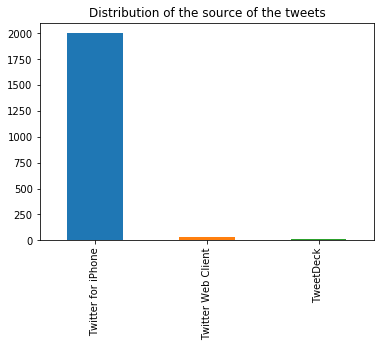

In [98]:
# Plot bar chart
df['source'].value_counts().plot(kind='bar')
plt.title('Distribution of the source of the tweets')
plt.savefig('Distribution of the source of tweets')

In [99]:
df.groupby('source')['retweet_count'].mean()

source
TweetDeck             1840.500000
Twitter Web Client    2162.866667
Twitter for iPhone    2629.015492
Name: retweet_count, dtype: float64

In [100]:
df.groupby('source')['favorite_count'].mean()

source
TweetDeck             4209.500000
Twitter Web Client    5226.866667
Twitter for iPhone    8146.336832
Name: favorite_count, dtype: float64

### Analysis of the various stages

In [101]:
# View value counts of the dog stages
df['dog_stage'].value_counts()

None       1723
pupper      221
doggo        65
puppo        24
floofer       8
Name: dog_stage, dtype: int64

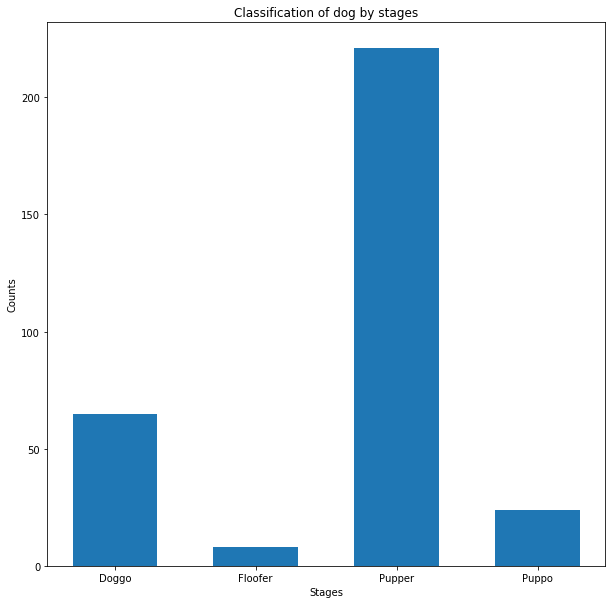

In [102]:
# Plot bar chart
dog_stage = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
counts  = [221, 65, 24, 8]

fig,ax = plt.subplots(figsize = (10,10))
ax.bar(dog_stage, counts, width = 0.6)
ax.set_ylabel('Counts')
ax.set_xlabel('Stages')
plt.title("Classification of dog by stages")
plt.show()
plt.savefig("Classification of dog by stages")

### Analysis of the breed of dogs

In [103]:
# View the value counts of the dog breeds
df['dog_breed'].value_counts()

None                          536
golden_retriever              146
Labrador_retriever             94
Pembroke                       88
Chihuahua                      81
pug                            57
chow                           44
Samoyed                        42
toy_poodle                     38
Pomeranian                     38
cocker_spaniel                 30
malamute                       30
French_bulldog                 25
miniature_pinscher             23
Chesapeake_Bay_retriever       23
German_shepherd                20
Cardigan                       19
Siberian_husky                 19
Shetland_sheepdog              18
beagle                         18
Staffordshire_bullterrier      18
Eskimo_dog                     18
Rottweiler                     17
Lakeland_terrier               17
Maltese_dog                    17
Shih-Tzu                       17
Italian_greyhound              16
kuvasz                         16
Pekinese                       13
Great_Pyrenees

### Insight
- The value count of the `dog_breed` column shows that the breed 539 dogs was not recorded. The golden retriver breed has the highest count of 146, the labrador retriever breed has a count of 94, the Pembroke breed has a count of 88, pugs have a count of 57, while the breeds with the least counts are EntleBucher, Japanese_spaniel, Clumber, Groenendael, Silky terrier, Standard schnauzer, and Scotch terrier.

### Average Retweet for each dog breed

In [104]:
# View the average retweet count of each dog breed
df.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending=False)

dog_breed
standard_poodle                9942.875000
Afghan_hound                   6350.000000
English_springer               5007.900000
Eskimo_dog                     4883.222222
Tibetan_mastiff                4715.800000
Saluki                         4568.000000
Cardigan                       4541.052632
Great_Pyrenees                 4431.076923
French_bulldog                 4338.640000
Samoyed                        4304.619048
Lakeland_terrier               4291.235294
flat-coated_retriever          4071.250000
Irish_water_spaniel            4005.666667
black-and-tan_coonhound        3680.000000
Labrador_retriever             3664.287234
cocker_spaniel                 3640.033333
golden_retriever               3483.568493
Norwegian_elkhound             3465.000000
Mexican_hairless               3448.000000
Leonberg                       3427.333333
giant_schnauzer                3396.333333
Border_terrier                 3026.142857
Irish_setter                   2938.333333
b

### Insight
- The top three breed with highest retweet counts are Standard poodle, Afghan hound, and English springer.
- The breeds with the lowest amount of retweets are Ibizan hound, Groenendael, Brabancon griffon.

## Average favorite count for each dog breed

In [105]:
# View the average favorite count of each dog breed
df.groupby('dog_breed')['favorite_count'].mean().sort_values(ascending=False)

dog_breed
Saluki                         22441.500000
French_bulldog                 17674.720000
black-and-tan_coonhound        15816.000000
flat-coated_retriever          15628.500000
Irish_water_spaniel            15154.666667
Leonberg                       13765.000000
Eskimo_dog                     13717.555556
English_springer               13085.400000
standard_poodle                12881.125000
basset                         12879.615385
Cardigan                       12659.526316
Border_terrier                 12602.571429
Great_Pyrenees                 12584.000000
Bedlington_terrier             12055.800000
Lakeland_terrier               11970.882353
Afghan_hound                   11968.250000
Mexican_hairless               11726.750000
Samoyed                        11552.547619
giant_schnauzer                11455.666667
Weimaraner                     11094.500000
Pembroke                       10676.022727
golden_retriever               10637.821918
Labrador_retriever    

### Insight
- The breeds favorited the most are Saluki, French bulldog, and Black and tan coonhound.
- The breeds favorited the least are Japanese spaniel, Ibizan hound, Brabancon griffon.

### Average ratings for each dog breed

In [106]:
# View the average rating numerator of each dog breed
df.groupby('dog_breed')['rating_numerator'].mean().sort_values(ascending=False)

dog_breed
clumber                        27.000000
None                           13.636194
Pomeranian                     12.868421
Saluki                         12.500000
Tibetan_mastiff                12.400000
briard                         12.333333
Border_terrier                 12.142857
kuvasz                         12.062500
silky_terrier                  12.000000
standard_schnauzer             12.000000
giant_schnauzer                12.000000
Irish_setter                   11.833333
Eskimo_dog                     11.777778
Gordon_setter                  11.750000
Samoyed                        11.738095
chow                           11.636364
golden_retriever               11.575342
Cardigan                       11.526316
wire-haired_fox_terrier        11.500000
Australian_terrier             11.500000
Great_Pyrenees                 11.461538
kelpie                         11.454545
Pembroke                       11.443182
Norfolk_terrier                11.428571
cocker

### Insight
- The breeds with the highest rating averages are Clumber, Soft coated wheaten terrier, and West highland white terrier.
- The breeds with the lowest rating averages are Norwich terrier, Scotch terrier, and Japanese spaniel.

### Analysis of WeRateDogs monthly data

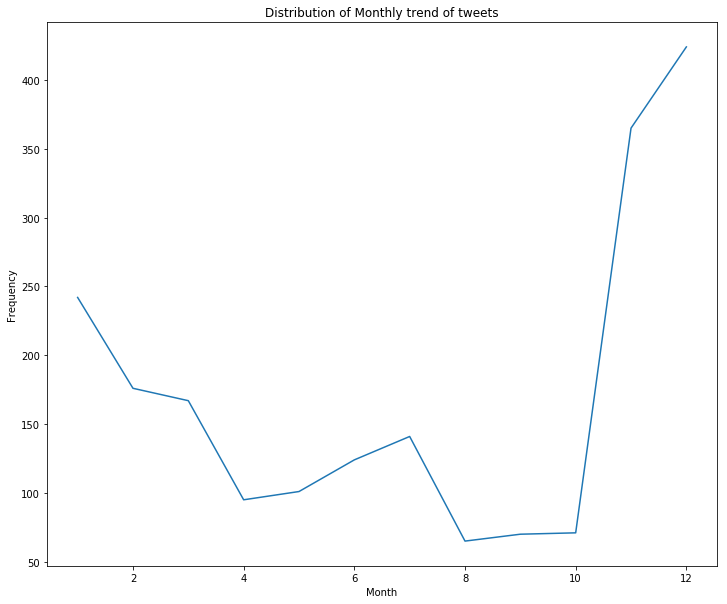

In [107]:
month = df['tweet_id'].groupby(df["timestamp"].dt.month).count()
fig, ax = plt.subplots(figsize=(12, 10))
ax = month.plot(kind='line', title='Distribution of Monthly trend of tweets')
ax.set_xlabel("Month")
ax.set_ylabel("Frequency");
plt.savefig('Monthly trend of tweets')

### Insight
- The line plot above shows that the number of tweets in December is the highest while, August has the lowest number of tweets